## 로컬에 있는 이미지 객체 인식

In [1]:
import boto3
import json

client = boto3.client('rekognition',region_name='ap-northeast-2')

# 해파리 인식
# 본 파일(.ipynb)와 같은 위치에 이미지 파일 놓을것!

with open('jellyfish.jpg','rb') as image_file:
    bytes_data = image_file.read() #바이트로 읽을 것

response = client.detect_labels(Image={'Bytes':bytes_data}) #내부적으로 Base64로 인코딩을 하므로 바이트 데이터로 전달해야함
# print(json.dumps(response,indent=2))
response

{'Labels': [{'Name': 'Animal',
   'Confidence': 95.51139831542969,
   'Instances': [],
   'Parents': [],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Sea Life',
   'Confidence': 95.51139831542969,
   'Instances': [],
   'Parents': [{'Name': 'Animal'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Invertebrate',
   'Confidence': 89.27242279052734,
   'Instances': [],
   'Parents': [{'Name': 'Animal'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Jellyfish',
   'Confidence': 89.27242279052734,
   'Instances': [],
   'Parents': [{'Name': 'Animal'},
    {'Name': 'Invertebrate'},
    {'Name': 'Sea Life'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Aquatic',
   'Confidence': 87.78662872314453,
   'Instances': [],
   'Parents': [{'Name': 'Water'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Water',
   'Confidence':

In [2]:
print(f"\n==== 객체 인식 결과 =====")
for item in response['Labels']:
    name = item['Name']
    confidence = item['Confidence'] #신뢰도
    print(f'{name}:{confidence}')


==== 객체 인식 결과 =====
Animal:95.51139831542969
Sea Life:95.51139831542969
Invertebrate:89.27242279052734
Jellyfish:89.27242279052734
Aquatic:87.78662872314453
Water:87.78662872314453
Insect:72.4620132446289
Outdoors:71.27171325683594
Nature:62.16446304321289
Reef:55.77022933959961
Sea:55.77022933959961


## S3에 있는 이미지로 객체인식

### S3에 있는 객체 가져오기

In [6]:
#s3안에 있는 버킷리스트

import boto3
client = boto3.client('s3',region_name='ap-northeast-2')
client.list_buckets()['Buckets']

[{'Name': 'aws-12012',
  'CreationDate': datetime.datetime(2023, 4, 4, 0, 54, 45, tzinfo=tzutc())},
 {'Name': 'aws-stu11',
  'CreationDate': datetime.datetime(2023, 4, 4, 1, 23, 43, tzinfo=tzutc())},
 {'Name': 'aws.ai.bucket17',
  'CreationDate': datetime.datetime(2023, 4, 4, 0, 49, 57, tzinfo=tzutc())},
 {'Name': 'aws.ai.sesac.bucket',
  'CreationDate': datetime.datetime(2023, 4, 3, 8, 33, 1, tzinfo=tzutc())},
 {'Name': 'aws.ai.sesac.expert.callsign.mvrick',
  'CreationDate': datetime.datetime(2023, 4, 3, 8, 33, 11, tzinfo=tzutc())},
 {'Name': 'aws.ai.sesac.hayul.bucket',
  'CreationDate': datetime.datetime(2023, 4, 3, 8, 34, 30, tzinfo=tzutc())},
 {'Name': 'aws.ai.sesac.j',
  'CreationDate': datetime.datetime(2023, 4, 3, 8, 33, 28, tzinfo=tzutc())},
 {'Name': 'aws.ai.sesac.j2',
  'CreationDate': datetime.datetime(2023, 4, 4, 0, 59, 37, tzinfo=tzutc())},
 {'Name': 'aws.ai.sesac.stu.bucket',
  'CreationDate': datetime.datetime(2023, 4, 3, 8, 33, 20, tzinfo=tzutc())},
 {'Name': 'aws.ai.

In [14]:
import boto3
buck = boto3.client('s3',region_name='ap-northeast-2')
response = buck.list_objects_v2(Bucket='sesac.yb')
response

{'ResponseMetadata': {'RequestId': '6S9KPZNMYBZ4V3WT',
  'HostId': 'xnx3bYoynsvkK3erx7bA5TSIUJ/EOgNRVYIkCRLdBaY6HVQkz6J3C4VMcRv+NiA7E+qe8t/MDQI=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'xnx3bYoynsvkK3erx7bA5TSIUJ/EOgNRVYIkCRLdBaY6HVQkz6J3C4VMcRv+NiA7E+qe8t/MDQI=',
   'x-amz-request-id': '6S9KPZNMYBZ4V3WT',
   'date': 'Tue, 04 Apr 2023 05:17:30 GMT',
   'x-amz-bucket-region': 'ap-northeast-2',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'IsTruncated': False,
 'Contents': [{'Key': 'jellyfish.jpg',
   'LastModified': datetime.datetime(2023, 4, 4, 5, 17, 25, tzinfo=tzutc()),
   'ETag': '"c3d0494f96df53f641c8312458e7d8bd"',
   'Size': 70860,
   'StorageClass': 'STANDARD'},
  {'Key': '강영현.jpg',
   'LastModified': datetime.datetime(2023, 4, 4, 5, 17, 24, tzinfo=tzutc()),
   'ETag': '"10af4177fbf1ec9d04fff47338d85553"',
   'Size': 206572,
   'StorageClass': 'STANDARD'}],
 'Name': 'sesac.yb',
 'Pre

In [15]:
response['Contents']

[{'Key': 'jellyfish.jpg',
  'LastModified': datetime.datetime(2023, 4, 4, 5, 17, 25, tzinfo=tzutc()),
  'ETag': '"c3d0494f96df53f641c8312458e7d8bd"',
  'Size': 70860,
  'StorageClass': 'STANDARD'},
 {'Key': '강영현.jpg',
  'LastModified': datetime.datetime(2023, 4, 4, 5, 17, 24, tzinfo=tzutc()),
  'ETag': '"10af4177fbf1ec9d04fff47338d85553"',
  'Size': 206572,
  'StorageClass': 'STANDARD'}]

In [24]:
import boto3
import random

# 버킷이름 지정
BUCK_NAME = 'sesac.yb'

# 파일리스트 가져오기

buck = boto3.client('s3', region_name='ap-northeast-2')
response = buck.list_objects_v2(Bucket=BUCK_NAME)

# 랜덤으로 한개의 파일을 선택

file_list = response['Contents']
file_names = [i['Key'] for i in response['Contents']]
# file = random.choice(file_list)
fname = random.choice(file_names)

# 선택된 파일 이름 출력
# print(file['Key'])
print(fname)

shark.jpg


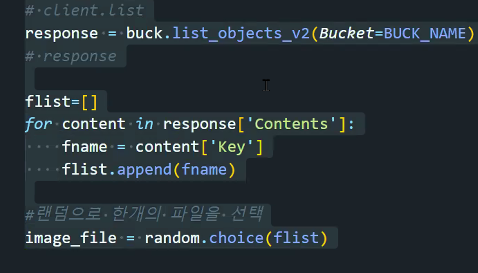